In [1]:
import numpy as np
import pandas as pd

# Load data

In [2]:
from etl import load_monsters, _mechanics, _stats, _flavor, _skills, get_monster_df

monsters, ogl = load_monsters()
monster_df = get_monster_df(monsters)

In [3]:
def make_action_df(x):
    df = pd.DataFrame(x.iloc[0], columns=['name', 'desc', 'attack_bonus', 'damage_dice', 'damage_bonus'])
    df = df.rename(index=str, columns={'name':'action'})
    df = df.set_index(['action'])
    return df

actions_df = monster_df.actions.groupby('name').apply(make_action_df)

In [4]:
actions_df.head(10)

desc  \
name               action                                                                  
Aboleth            Multiattack                 The aboleth makes three tentacle attacks.   
                   Tentacle            Melee Weapon Attack: +9 to hit, reach 10 ft., ...   
                   Tail                Melee Weapon Attack: +9 to hit, reach 10 ft. o...   
                   Enslave (3/day)     The aboleth targets one creature it can see wi...   
Acolyte            Club                Melee Weapon Attack: +2 to hit, reach 5 ft., o...   
Adult Black Dragon Multiattack         The dragon can use its Frightful Presence. It ...   
                   Bite                Melee Weapon Attack: +11 to hit, reach 10 ft.,...   
                   Claw                Melee Weapon Attack: +11 to hit, reach 5 ft., ...   
                   Tail                Melee Weapon Attack: +11 to hit, reach 15 ft.,...   
                   Frightful Presence  Each creature of the dragon's choice that is w...   

                                      attack_bonus damage_dice  damage_bonus  
name               action                                                     
Aboleth            Multiattack                   0         NaN           NaN  
                   Tentacle                      9         2d6           5.0  
                   Tail                          9         3d6           5.0  
                   Enslave (3/day)               0         NaN           NaN  
Acolyte            Club                          2         1d4           NaN  
Adult Black Dragon Multiattack                   0         NaN           NaN  
                   Bite                         11  2d10 + 1d8           6.0  
                   Claw                         11         2d6           6.0  
                   Tail                         11         2d8           6.0  
                   Frightful Presence            0         NaN           NaN

In [5]:
def make_special_abilities_df(x):
    df = pd.DataFrame(x.iloc[0], columns=['name', 'desc', 'attack_bonus', 'damage_dice'])
    df = df.rename(index=str, columns={'name':'special_ability'})
    df = df.set_index(['special_ability'])
    return df

special_abilities_df = monster_df.special_abilities.groupby('name').apply(make_special_abilities_df)

In [6]:
special_abilities_df.head(10)

desc  \
name                 special_ability                                                                   
Aboleth              Amphibious                               The aboleth can breathe air and water.   
                     Mucous Cloud                  While underwater, the aboleth is surrounded by...   
                     Probing Telepathy             If a creature communicates telepathically with...   
Acolyte              Spellcasting                  The acolyte is a 1st-level spellcaster. Its sp...   
Adult Black Dragon   Amphibious                                The dragon can breathe air and water.   
                     Legendary Resistance (3/Day)  If the dragon fails a saving throw, it can cho...   
Adult Blue Dracolich Legendary Resistance (3/Day)  If the dracolich fails a saving throw, it can ...   
                     Magic Resistance              The dracolich has advantage on saving throws a...   
Adult Blue Dragon    Legendary Resistance (3/Day)  If the dragon fails a saving throw, it can cho...   
Adult Brass Dragon   Legendary Resistance (3/Day)  If the dragon fails a saving throw, it can cho...   

                                                  attack_bonus damage_dice  
name                 special_ability                                        
Aboleth              Amphibious                              0         NaN  
                     Mucous Cloud                            0         NaN  
                     Probing Telepathy                       0         NaN  
Acolyte              Spellcasting                            0         NaN  
Adult Black Dragon   Amphibious                              0         NaN  
                     Legendary Resistance (3/Day)            0         NaN  
Adult Blue Dracolich Legendary Resistance (3/Day)            0         NaN  
                     Magic Resistance                        0         NaN  
Adult Blue Dragon    Legendary Resistance (3/Day)            0         NaN  
Adult Brass Dragon   Legendary Resistance (3/Day)            0         NaN

## Additional data

In [7]:
import requests

url = 'https://raw.githubusercontent.com/vorpalhex/srd_spells/master/spells.json'
r = requests.get(url)
spells = r.json()

In [8]:
spells_df = pd.DataFrame(spells)

In [9]:
spells_df.head()

,casting_time,classes,components,description,duration,higher_levels,level,name,range,ritual,school,tags,type
0,1 action,"[sorcerer, wizard]","{'material': False, 'raw': 'V, S', 'somatic': ...",You hurl a bubble of acid. Choose one creature...,Instantaneous,NaN,cantrip,Acid Splash,60 feet,False,Conjuration,"[sorcerer, wizard, cantrip]",Conjuration cantrip
1,1 action,"[ranger, wizard]","{'material': True, 'materials_needed': ['a tin...",You set an alarm against unwanted intrusion. C...,8 hours,NaN,1,Alarm,30 feet,True,abjuration,"[ranger, wizard, level1]",1st-level abjuration (ritual)
2,1 action,"[bard, druid, ranger]","{'material': True, 'materials_needed': ['a mor...",This spell lets you convince a beast that you ...,24 hours,When you cast this spell using a spell slot of...,1,Animal Friendship,30 feet,False,enchantment,"[bard, druid, ranger, level1]",1st-level enchantment
3,1 action,"[bard, cleric]","{'material': True, 'materials_needed': ['a dro...",Up to three creatures of your choice that you ...,"Concentration, up to 1 minute",When you cast this spell using a spell slot of...,1,Bane,30 feet,False,enchantment,"[bard, cleric, level1]",1st-level enchantment
4,1 action,"[bard, sorcerer, warlock, wizard]","{'material': False, 'raw': 'V, S', 'somatic': ...",You extend your hand and trace a sigil of ward...,1 Round,NaN,cantrip,Blade Ward,Self,False,Abjuration,"[bard, sorcerer, warlock, wizard, cantrip]",Abjuration cantrip


Some data cleaning is necessary.

In [10]:
spells_df = spells_df.fillna('')

In [11]:
spells_df[spells_df.level=='wind']

,casting_time,classes,components,description,duration,higher_levels,level,name,range,ritual,school,tags,type
166,10 minutes,"[cleric, druid, wizard]","{'material': True, 'materials_needed': ['burni...",You take control of the weather within 5 miles...,"Concentration, up to 8 hours",,wind,Control Weather,Self (5-mile radius),False,,"[cleric, druid, wizard, level8]",Wind


In [12]:
spells_df.loc[166, 'level'] = '8'

In [13]:
spells_df['level'] = pd.to_numeric(spells_df['level'], errors='coerce')
spells_df['level'].fillna(0, inplace=True)

In [14]:
spells_df.head()

,casting_time,classes,components,description,duration,higher_levels,level,name,range,ritual,school,tags,type
0,1 action,"[sorcerer, wizard]","{'material': False, 'raw': 'V, S', 'somatic': ...",You hurl a bubble of acid. Choose one creature...,Instantaneous,,0.0,Acid Splash,60 feet,False,Conjuration,"[sorcerer, wizard, cantrip]",Conjuration cantrip
1,1 action,"[ranger, wizard]","{'material': True, 'materials_needed': ['a tin...",You set an alarm against unwanted intrusion. C...,8 hours,,1.0,Alarm,30 feet,True,abjuration,"[ranger, wizard, level1]",1st-level abjuration (ritual)
2,1 action,"[bard, druid, ranger]","{'material': True, 'materials_needed': ['a mor...",This spell lets you convince a beast that you ...,24 hours,When you cast this spell using a spell slot of...,1.0,Animal Friendship,30 feet,False,enchantment,"[bard, druid, ranger, level1]",1st-level enchantment
3,1 action,"[bard, cleric]","{'material': True, 'materials_needed': ['a dro...",Up to three creatures of your choice that you ...,"Concentration, up to 1 minute",When you cast this spell using a spell slot of...,1.0,Bane,30 feet,False,enchantment,"[bard, cleric, level1]",1st-level enchantment
4,1 action,"[bard, sorcerer, warlock, wizard]","{'material': False, 'raw': 'V, S', 'somatic': ...",You extend your hand and trace a sigil of ward...,1 Round,,0.0,Blade Ward,Self,False,Abjuration,"[bard, sorcerer, warlock, wizard, cantrip]",Abjuration cantrip


# Text analysis methods
This follows Patrick Harrison's [**Modern NLP in Python**](https://github.com/skipgram/modern-nlp-in-python/blob/master/executable/Modern_NLP_in_Python.ipynb) tutorial.

In [15]:
import spacy

nlp = spacy.load('en')

In [16]:
spells_df.shape

(379, 13)

In [17]:
spell = nlp(spells_df.description.iloc[10])

In [18]:
for i, x in enumerate(spell.sents):
    print(i, x)

0 A dazzling array of flashing, colored light springs from your hand.
1 Roll 6d10; the total is how many hit points of creatures this spell can effect.
2 Creatures in a 15-foot cone originating from you are affected in ascending order of their current hit points (ignoring unconscious creatures and creatures that can't see).


3 Starting with the creature that has the lowest current hit points, each creature affected by this spell is blinded until the spell ends.
4 Subtract each creature's hit points from the total before moving on to the creature with the next lowest hit points.
5 A creature's hit points must be equal to or less than the remaining total for that creature to be affected.


In [19]:
for i, ent in enumerate(spell.ents):
    print ('{}: {} - {}'.format(i, ent, ent.label_))

0: Roll 6d10 - PERSON
1: 15-foot - CARDINAL


### Phrase modeling

Due to the highly structured nature of the corpus, phrase modeling will be an effective method for reducing dimensionality.

In [20]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models.word2vec import LineSentence

Using TensorFlow backend.


In [21]:
def punct_space(token):
    return token.is_punct or token.is_space

def entry_to_lines(filename):
    with open(filename, encoding='utf_8') as f:
        for entry in f:
            yield entry.replace('\\n', '\n')
    return
            
def lemmatized_sentence_corpus(filename):
    for parsed_review in nlp.pipe(entry_to_lines(filename),
                                  batch_size=10000, n_threads=4):
        for sent in parsed_review.sents:
            yield u' '.join([token.lemma_ for token in sent if not punct_space(token)])

In [22]:
import tempfile

raw_spells = tempfile.NamedTemporaryFile(mode='w')
with open(raw_spells.name, 'w') as f:
    for x in spells_df.description:
        if type(x) is str:
            f.write(x)
        f.write('\n')

In [23]:
unigram = tempfile.NamedTemporaryFile(mode='w')

with open(unigram.name, 'w') as f:
    for sentence in lemmatized_sentence_corpus(raw_spells.name):
        f.write(sentence + '\n')

unigram_sentences = LineSentence(unigram.name)

In [24]:
bigram_model = Phrases(unigram_sentences)

bigram = tempfile.NamedTemporaryFile(mode='w')

with open(bigram.name, 'w') as f:
    for unigram_sentence in unigram_sentences:
        bigram_sentence = u' '.join(bigram_model[unigram_sentence])
        f.write(bigram_sentence + '\n')

bigram_sentences = LineSentence(bigram.name)

/Users/jason/Code/cr/lib/python3.6/site-packages/gensim/models/phrases.py:316: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [25]:
trigram_model = Phrases(bigram_sentences)

trigram = tempfile.NamedTemporaryFile(mode='w')

with open(trigram.name, 'w') as f:
    for bigram_sentence in bigram_sentences:
        trigram_sentence = u' '.join(trigram_model[bigram_sentence])
        f.write(trigram_sentence + '\n')

trigram_sentences = LineSentence(trigram.name)

/Users/jason/Code/cr/lib/python3.6/site-packages/gensim/models/phrases.py:316: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### Word vector embedding

In [26]:
total_words = sum(len(x) for x in trigram_sentences)

In [27]:
from gensim.models import Word2Vec

word2vec_file = tempfile.NamedTemporaryFile(mode='w')

spell2vec = Word2Vec(trigram_sentences, size=100, window=5, min_count=5, workers=4)
spell2vec.save(word2vec_file.name)

# perform another 11 epochs of training
for i in range(11):
    spell2vec.train(trigram_sentences, total_words=total_words, epochs=1)
    spell2vec.save(word2vec_file.name)

print(u'{} training epochs so far.'.format(spell2vec.train_count))

spell2vec.init_sims()

12 training epochs so far.


In [28]:
len(spell2vec.wv.vocab)

966

In [29]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in spell2vec.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda x: -x[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
word_vectors = pd.DataFrame(spell2vec.wv.syn0norm[term_indices, :],
                            index=ordered_terms)
word_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
-PRON-,-0.099170,0.004889,-0.067528,0.096756,0.066683,0.086718,0.097956,0.081749,-0.031465,-0.023652,...,-0.073480,0.084996,-0.008937,0.068699,0.024856,-0.021766,0.031028,0.281871,-0.093936,0.107084
the,-0.136174,-0.062945,-0.033426,-0.078936,-0.010010,0.087430,0.077923,-0.120667,-0.131635,0.082408,...,0.079010,0.046890,0.029864,0.166761,0.090260,-0.040879,-0.096480,0.413119,0.059315,-0.013895
a,-0.039877,-0.246909,-0.029014,0.024889,0.004789,0.108308,-0.118603,-0.039177,-0.046104,-0.149969,...,-0.255707,-0.061750,0.168107,-0.002864,0.030365,-0.075513,-0.074612,0.182180,-0.044814,-0.100271
of,-0.140861,-0.132680,0.023409,0.173964,0.202179,0.107665,-0.074588,-0.105230,-0.229920,-0.038949,...,0.041819,0.059522,0.050073,-0.113198,0.004900,0.030858,-0.092308,0.112990,-0.073153,0.011678
creature,-0.133125,-0.108219,-0.042745,-0.063309,0.028504,0.123274,0.026673,0.035732,-0.137718,-0.068915,...,-0.153784,0.032740,0.076511,0.048129,0.071262,0.009226,-0.033977,0.304090,0.016960,0.014894


#### [Todo]: visualize, and clean up the code above. Figure out how to use the model to create the lemmatized text for each example, and to prepare it in a dataframe for doc2vec.

# Doc2Vec
We'll follow the gensim Doc2Vec [tutorial](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-lee.ipynb).

#### Goal
learn a vector embedding for each document in the corpus, and train a multinomial classifier on the vector embeddings.

In [30]:
def read_corpus(fname, training=False):
    with open(fname, 'r') as f:
        for i, line in enumerate(f):
            if training:
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])
            else:
                yield gensim.utils.simple_preprocess(line)

In [31]:
spells_df.head()

,casting_time,classes,components,description,duration,higher_levels,level,name,range,ritual,school,tags,type
0,1 action,"[sorcerer, wizard]","{'material': False, 'raw': 'V, S', 'somatic': ...",You hurl a bubble of acid. Choose one creature...,Instantaneous,,0.0,Acid Splash,60 feet,False,Conjuration,"[sorcerer, wizard, cantrip]",Conjuration cantrip
1,1 action,"[ranger, wizard]","{'material': True, 'materials_needed': ['a tin...",You set an alarm against unwanted intrusion. C...,8 hours,,1.0,Alarm,30 feet,True,abjuration,"[ranger, wizard, level1]",1st-level abjuration (ritual)
2,1 action,"[bard, druid, ranger]","{'material': True, 'materials_needed': ['a mor...",This spell lets you convince a beast that you ...,24 hours,When you cast this spell using a spell slot of...,1.0,Animal Friendship,30 feet,False,enchantment,"[bard, druid, ranger, level1]",1st-level enchantment
3,1 action,"[bard, cleric]","{'material': True, 'materials_needed': ['a dro...",Up to three creatures of your choice that you ...,"Concentration, up to 1 minute",When you cast this spell using a spell slot of...,1.0,Bane,30 feet,False,enchantment,"[bard, cleric, level1]",1st-level enchantment
4,1 action,"[bard, sorcerer, warlock, wizard]","{'material': False, 'raw': 'V, S', 'somatic': ...",You extend your hand and trace a sigil of ward...,1 Round,,0.0,Blade Ward,Self,False,Abjuration,"[bard, sorcerer, warlock, wizard, cantrip]",Abjuration cantrip


# [TODO]: Techniques to apply

* Bag of words - construct weighted encoding of key words, train on weights
    * Tf–idf or counter
* word2vec - construct word embeddings, average, and train on average
    * consider using an auto-encoder
* feature engineering

use a more sophisticated loss function (ordinal regression - c.f. mord on pypi doesn't work)

Lee, Yoonkyung, Yi Lin, and Grace Wahba. "Multicategory support
vector machines: Theory and application to the classification of
microarray data and satellite radiance data." Journal of the
American Statistical Association 99.465 (2004): 67-81

## Bag of words with logistic regression

In [32]:
X = spells_df['description'] + spells_df['higher_levels']
y = spells_df['level']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])

pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [34]:
pipeline.score(X, y)

0.75197889182058042

In [35]:
pred = pd.DataFrame(pipeline.predict_proba(X), columns=pipeline.classes_)
pred['level'] = y
pred['level_hat'] = pipeline.predict(X)
pred['name'] = spells_df['name']

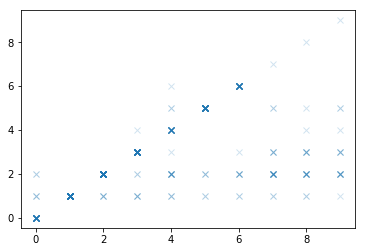

In [55]:
plt.plot(pred['level'], pred['level_hat'], 'x', alpha=0.2)
plt.show()

In [36]:
pred[pred.level != pred.level_hat].head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,level,level_hat,name
24,0.207831,0.213080,0.129044,0.087321,0.078354,0.088914,0.072199,0.041186,0.044081,0.037991,0.0,1.0,Eldritch Blast
49,0.185160,0.116862,0.210702,0.129589,0.072867,0.079722,0.063907,0.049409,0.048579,0.043203,0.0,2.0,Light
55,0.131843,0.165125,0.155568,0.134159,0.075335,0.106940,0.087367,0.053545,0.047564,0.042553,0.0,1.0,Message
71,0.149884,0.151201,0.191585,0.129379,0.068979,0.106455,0.063960,0.048477,0.045328,0.044753,0.0,2.0,Shillelagh
86,0.058000,0.264448,0.250306,0.110267,0.072967,0.072915,0.064827,0.040513,0.030334,0.035424,2.0,1.0,Aid


## word2vec with logistic regression

### Continuous bag of words (CBOW) vs Skip-gram
Skip-gram tends to perform better then CBOW on large datasets, while CBOW generally outperforms Skip-gram on small datasets; see this [Tensorflow tutorial](https://www.tensorflow.org/tutorials/word2vec) for references.

In [37]:
import tempfile

corpus_file = tempfile.NamedTemporaryFile(mode='w')
with open(corpus_file.name, 'w') as f:
    for x in spells_df.description:
        if type(x) is str:
            f.write(x)
        f.write('\n')

unigram_file = tempfile.NamedTemporaryFile(mode='w')
with open(unigram_file.name, 'w') as f:
    for sentence in lemmatized_sentence_corpus(corpus_file.name):
        f.write(sentence + '\n')

unigram_sentences = LineSentence(unigram_file.name)

In [38]:
def build_models(corpus, passes=1):
    models = list()
    fname = make_lemmatized_corpus(corpus)

    for i in range(passes):
        sentences = LineSentence(fname)
        model, fname = create_model(sentences)
        models.append(model)
    return models


def make_lemmatize_corpus(corpus):
    tmp_file = tempfile.NamedTemporaryFile(mode='w')
    with open(tmp_file.name, 'w') as f:
        for sentence in lemmatized_sentence_corpus(corpus_file.name):
            f.write(sentence + '\n')
    return tmp_file.name


def create_model(sentences):
    phrases = Phrases(sentences)
    model = Phraser(phrases)
    tmp_file = tempfile.NamedTemporaryFile(mode='w')
    with open(tmp_file.name, 'w') as f:
        for sentence in sentences:
            sentence = u' '.join(model[sentence])
            f.write(sentence + '\n')
    return model, tmp_file.name

In [39]:
total_words = sum(len(x) for x in trigram_sentences)
word2vec_file = tempfile.NamedTemporaryFile(mode='w')

spell2vec = Word2Vec(trigram_sentences, size=100, window=5, min_count=5, workers=4)
spell2vec.save(word2vec_file.name)

# perform another 11 epochs of training
for i in range(11):
    spell2vec.train(trigram_sentences, total_words=total_words, epochs=1)
    spell2vec.save(word2vec_file.name)

print(u'{} training epochs so far.'.format(spell2vec.train_count))

spell2vec.init_sims()
len(spell2vec.wv.vocab)

12 training epochs so far.


966

## Using only Keras

In [40]:
corpus_file = tempfile.NamedTemporaryFile(mode='w')
with open(corpus_file.name, 'w') as f:
    for x in spells_df.description:
        if type(x) is str:
            f.write(x)
        f.write('\n')

In [41]:
corpus_file.name

'/var/folders/4d/2_vxy65n171blyghwfcl628h0000gn/T/tmpo3wjjonr'

1. tokenize
1. embed


In [42]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)
with open(corpus_file.name, 'r') as f:
    texts = f.readlines()
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
maxlen = max(map(len, sequences))
print(maxlen)

Found 3391 unique tokens.
146


In [43]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(X.values)
sequences = tokenizer.texts_to_sequences(X.values)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
max_features = len(word_index)
maxlen = max(map(len, sequences))
print(maxlen)

Found 3410 unique tokens.
282


In [44]:
from sklearn.model_selection import train_test_split
from keras import preprocessing

x_train, x_test, y_train, y_test = train_test_split(sequences, y)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

## Using an LSTM RNN

In [58]:
from keras.layers import Bidirectional, Dense
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32,
              dropout=0.2,
              recurrent_dropout=0.2,
              return_sequences=True))
model.add(GRU(64,
              dropout=0.2,
              recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mse'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          109120    
_________________________________________________________________
gru_3 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
__________

In [59]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2)

Train on 227 samples, validate on 57 samples
Epoch 1/40
227/227 [==============================] - 5s - loss: 19.2265 - mean_squared_error: 19.2265 - val_loss: 15.0891 - val_mean_squared_error: 15.0891
Epoch 2/40
227/227 [==============================] - 3s - loss: 18.3863 - mean_squared_error: 18.3863 - val_loss: 13.8393 - val_mean_squared_error: 13.8393
Epoch 3/40
227/227 [==============================] - 3s - loss: 16.6414 - mean_squared_error: 16.6414 - val_loss: 11.0227 - val_mean_squared_error: 11.0227
Epoch 4/40
227/227 [==============================] - 3s - loss: 12.5157 - mean_squared_error: 12.5157 - val_loss: 5.6848 - val_mean_squared_error: 5.6848
Epoch 5/40
227/227 [==============================] - 3s - loss: 8.6227 - mean_squared_error: 8.6227 - val_loss: 6.4835 - val_mean_squared_error: 6.4835
Epoch 6/40
227/227 [==============================] - 3s - loss: 7.8550 - mean_squared_error: 7.8550 - val_loss: 5.4047 - val_mean_squared_error: 5.4047
Epoch 7/40
227/227 [===

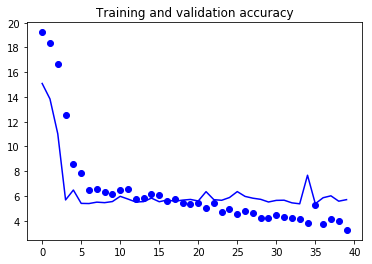

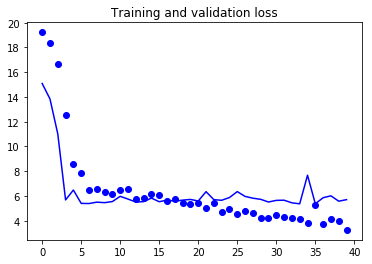

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [61]:
model.evaluate(x_test, y_test)

95/95 [==============================] - 0s     


[6.3943846351221989, 6.3943846351221989]

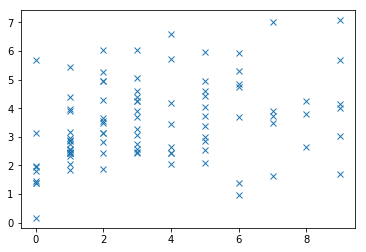

In [62]:
y_hat = model.predict(x_test)

plt.plot(y_test, y_hat, 'x')
plt.show()

In [66]:
from keras.layers import Bidirectional, Dense
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
# model.add(GRU(32,
#               dropout=0.2,
#               recurrent_dropout=0.2,
#               return_sequences=True))
model.add(GRU(64,
              dropout=0.2,
              recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          109120    
_________________________________________________________________
gru_9 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                170       
Total params: 130,522
Trainable params: 130,522
Non-trainable params: 0
_________________________________________________________________


In [71]:
from keras.utils import to_categorical

y_cat = to_categorical(y_train, 10)

In [72]:
history = model.fit(x_train, y_cat,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2)

Train on 227 samples, validate on 57 samples
Epoch 1/40
227/227 [==============================] - 3s - loss: 2.3025 - acc: 0.0925 - val_loss: 2.2956 - val_acc: 0.2105
Epoch 2/40
227/227 [==============================] - 1s - loss: 2.2959 - acc: 0.2159 - val_loss: 2.2904 - val_acc: 0.1930
Epoch 3/40
227/227 [==============================] - 1s - loss: 2.2899 - acc: 0.1982 - val_loss: 2.2844 - val_acc: 0.2281
Epoch 4/40
227/227 [==============================] - 1s - loss: 2.2849 - acc: 0.1498 - val_loss: 2.2804 - val_acc: 0.1754
Epoch 5/40
227/227 [==============================] - 1s - loss: 2.2810 - acc: 0.1982 - val_loss: 2.2747 - val_acc: 0.1754
Epoch 6/40
227/227 [==============================] - 1s - loss: 2.2729 - acc: 0.1938 - val_loss: 2.2672 - val_acc: 0.1404
Epoch 7/40
227/227 [==============================] - 1s - loss: 2.2651 - acc: 0.2115 - val_loss: 2.2612 - val_acc: 0.1404
Epoch 8/40
227/227 [==============================] - 1s - loss: 2.2574 - acc: 0.2159 - val_lo

In [73]:
model.evaluate(x_train, y_cat)

284/284 [==============================] - 1s     


[1.8930673632823245, 0.34859155055502772]

In [50]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 282, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2256)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2257      
Total params: 82,257
Trainable params: 82,257
Non-trainable params: 0
_________________________________________________________________


### Using pre-computed word vectors

In [52]:
import os

glove_dir = 'data/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros. THIS MAY BE TROUBLE FOR OUR APPLICATION.
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.layers import Embedding